# Task 1: Look at the big picture and frame the problem.

## Frame the problem:

1. Supervised learning – training examples are labeled (with pizza sales prices).
2. A regression task – predict a numerical value (the sales price of a pizza).
3. Batch learning
    - Small data set
    - No continuous flow of data coming into the system
    - No need to adjust to changing data rapidly

## Looking at the bigger picture:

### Dataset Description

 1. Unnamed: 0 - ID used to track the index of a data instance (numerical: 1 to 49574)
 2. id - unique sales ID for each pizza order used to differentiate between different pizza orders (nominal: e.g “2015-000005”)
 3. date - the date that the pizza was sold (nominal: a string representing a date e.g. “2015-01-01”)
 4. time - the time the pizza was sold at (nominal: a string representing a time e.g. “12:21:30”)
 5. name - the abbreviated name of the pizza on the menu (nominal: e.g. “classic_dlx”)
 6. size - the size of the pizza (nominal: “S”, “M”, “L”, “XL”, or “XXL”)
 7. type - the type of pizza based on its main ingredients (nominal: “classic”, “veggie”, “chicken”, or “supreme”)
 8. price - the price of the pizza (numerical: 9.75 to 35.95, target value/what our models will be trying to predict)

Missing Values: This dataset has no missing values.
Duplicate Values: This dataset contains 954 duplicate values.

### Task: To predict the sales trends of pizza.

This can be used by pizza restaurants to aid them in understanding what the customer is willing to pay and can help them price their menu offerings more appropriately. Also helps to increase their profit by improving their menu options and prices.

# Task 2: Load the Dataset

In [1]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data from our github repository

url = "https://raw.githubusercontent.com/Not-Macaroni/Final-Project-Dataset---Pizza-Sales/main/pizzaplace.csv"
pizza = pd.read_csv(url, sep=',')

# Task 3: Perform EDA on the dataset

### Take a quick look at the data set.

In [3]:
# Here we want to take a quick look at the first and last 5 rows in the dataset
# This helps us to get a better understanding of the dataset structure, data types present, and the purpose of each column

# From here we can identify that our target column is price
# Also there is additional column named "Unnamed: 0" which acts as an index
# this index column is unneeded since this dataset is already index when we load it, so we will remove this column

pizza

,Unnamed: 0,id,date,time,name,size,type,price
0,1,2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
1,2,2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.00
2,3,2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.00
3,4,2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
4,5,2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.50
...,...,...,...,...,...,...,...,...
49569,49570,2015-021348,2015-12-31,21:23:10,four_cheese,L,veggie,17.95
49570,49571,2015-021348,2015-12-31,21:23:10,napolitana,S,classic,12.00
49571,49572,2015-021348,2015-12-31,21:23:10,ckn_alfredo,M,chicken,16.75
49572,49573,2015-021349,2015-12-31,22:09:54,mexicana,L,veggie,20.25


In [4]:
# We drop the "Unnamed: 0" since the data is already indexed and
# we do not want this additional column to effect training and testing later on

pizza.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
# Here we just take a quick look at the numerical attributes of the date

pizza.describe()

,price
count,49574.000000
mean,16.497762
std,3.621954
min,9.750000
25%,12.750000
50%,16.500000
75%,20.250000
max,35.950000


### Data Visualization

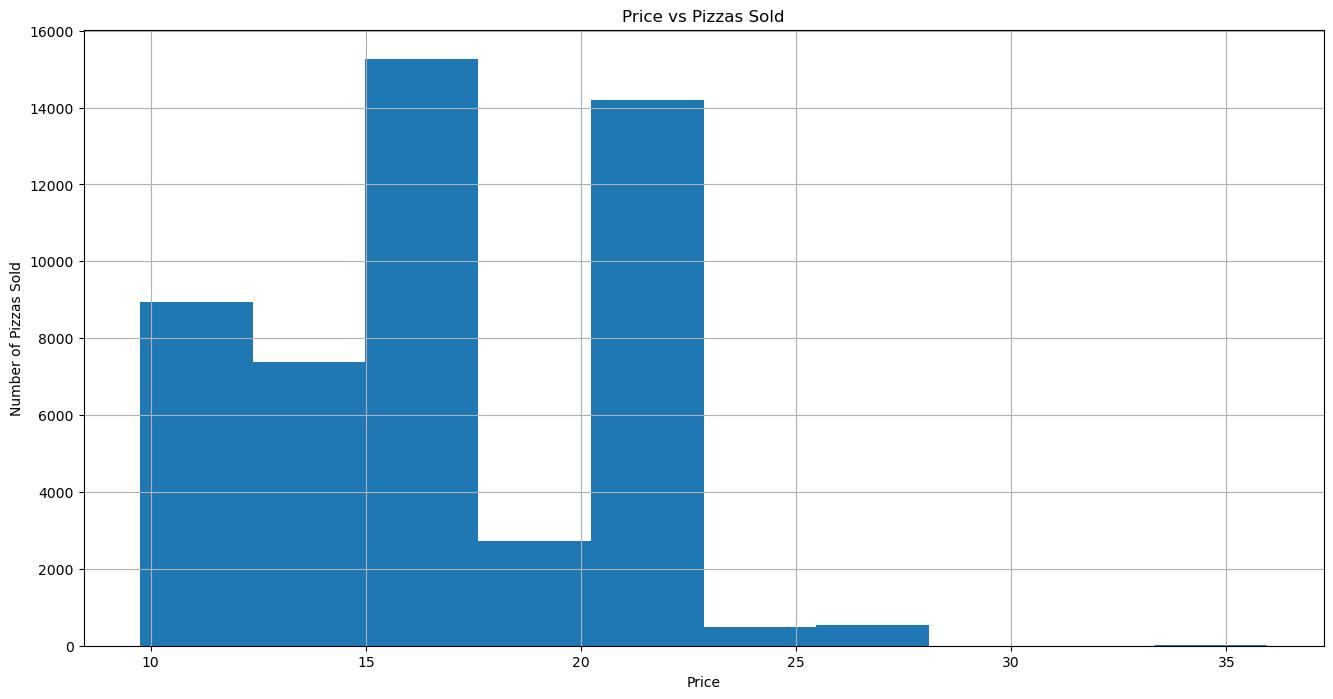

In [6]:
# This creates a histogram that shows up the numbers of pizzas sold by price

pizza.hist(figsize=(16, 8))
plt.title('Price vs Pizzas Sold')
plt.xlabel('Price')
plt.ylabel('Number of Pizzas Sold')
plt.show()

This histogram shows us the number of pizzas sold by price. From this, we can gain the following insights:
   1. The three most common prices for pizza
   2. The three least common prices for pizza
   3. The maximum and minimum prices paid for pizza
   
These could all be further explored by looking at other relationships with price and specific pizza attributes to get a better understanding of what determines pizza prices.

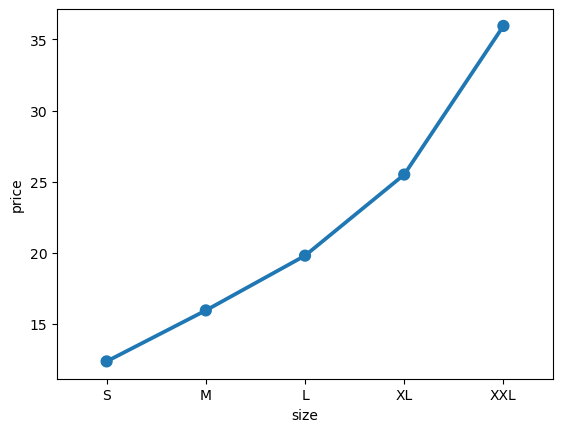

In [7]:
# This creates a point plot chart which shows up the realtionship between price and pizza size

SizevsPrice = sns.pointplot(x="size", y="price", order=['S', 'M', 'L', 'XL', 'XXL'], data=pizza)

This point plot shows us the relationship between the price of a pizza and that pizza's size.

As we can see the price of the pizza increases with the size of the pizza. This demonstrates a positive correlation between pizza price and pizza size.

Additionally, since we have price as our dependent variable and size as our independent variable we can see that price is partially dependent on price.

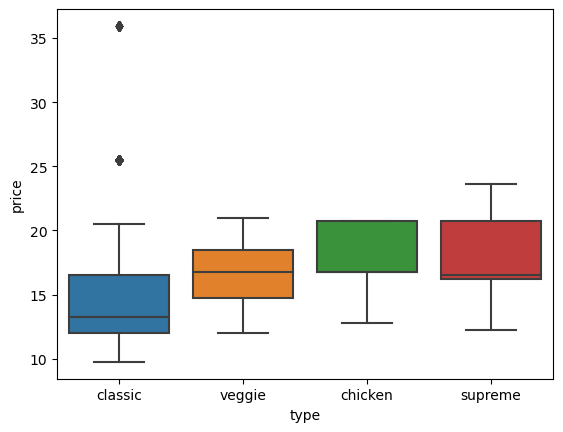

In [8]:
# This boxplot shows us the range of prices for different types of pizzas

TypevsPrice = sns.boxplot(x="type", y="price", data=pizza)

This boxplot shows us the relationship between price and pizza type, as well as the range of prices for each type of pizza.

As we can see the price varies based on type with some being more expensive than others, likely due to the ingredients used. Pizzas that don't contain meat have a higher price range than those that do.

Furthermore, we can see that the price of a pizza generally falls into a specific range based on its type. 

# Task 4: Prepare the data for modelling

### Find and remove duplicate data entries

Since all pizza orders have a unique ID we don't have to worry about removing entries that share the same pizza name, type, price, date, and delivery time but were separate/different orders.

In [9]:
# Here we find and count the number of duplicate data entries
print(f"Number of duplicate records: {+pizza.duplicated().sum()}")
print("--------------------------------")

# This shows the shape/number of data entries before we remove the duplicates
print(f"Before: {pizza.shape}")

# Here we remove the duplicates
pizza.drop_duplicates(inplace=True)

# This shows the shape/number of data entries after we remove the duplicates
# As we can see the 954 duplicate records have been removed
print(f"After: {pizza.shape}")

Number of duplicate records: 954
--------------------------------
Before: (49574, 7)
After: (48620, 7)


### Look for missing values

In [10]:
# This snippet of code is from section 4.2 in the end-to-end student notebook posted on eclass 
# and was written by Professor Ruba Al Omari

# Find and count all the '?' values in the dataset
(pizza.values == '?').sum()

# Replace all '?' values is NaN
pizza = pizza.replace('?', np.nan)

# Count all NaN values in the dataset
pizza.isna().sum()

# Get a quick description of the data after replacing all the '?' value.
print(pizza.isna().sum())

id       0
date     0
time     0
name     0
size     0
type     0
price    0
dtype: int64


As we can see above this dataset does not contain any missing values in any of the columns.

### Binning the time column

The time column shows the delivery time of a pizza down to a second. This high variation does not help us with predicting the cost of a pizza so we want to bin these values into specific time intervals so that they are more useful for predictions and training the model.

We chose to break the day down into 3-hour intervals (i.e. 0:00 - 3:00, 3:00 - 6:00, ..., 21:00 - 0:00). By using intervals we can get a better estimation of the general times when people order pizza. We can see if there is a high influx of people ordering around lunch or dinner, and if ordering around these high-demand times leads to an increase in the cost of pizza.

In [11]:
# Create our bins
# We set the start time to '0 hours' for midnight
# We specify the end of the day as '24 hours'
# We set our intervals for every 3 hours
bins = pd.interval_range(start=pd.to_timedelta('0 hours'), end=pd.to_timedelta('24 hours'), freq='3H')

# Here we replace the values for delivery time with our new binned time intervals
# We use the cut function to create and apply our bins that we created earlier
# We use the apply method to format the time values so that they only show us the time and not the date
pizza['time'] = pd.cut(pizza['time'], bins=bins).apply(lambda x: f"{x.left.components.hours:02d}:00-{x.right.components.hours:02d}:00")

# Show the dataset with the new time values
print(pizza)

                id        date         time         name size     type  price
0      2015-000001  2015-01-01  09:00-12:00     hawaiian    M  classic  13.25
1      2015-000002  2015-01-01  09:00-12:00  classic_dlx    M  classic  16.00
2      2015-000002  2015-01-01  09:00-12:00     mexicana    M   veggie  16.00
3      2015-000002  2015-01-01  09:00-12:00     thai_ckn    L  chicken  20.75
4      2015-000002  2015-01-01  09:00-12:00  five_cheese    L   veggie  18.50
...            ...         ...          ...          ...  ...      ...    ...
49569  2015-021348  2015-12-31  21:00-00:00  four_cheese    L   veggie  17.95
49570  2015-021348  2015-12-31  21:00-00:00   napolitana    S  classic  12.00
49571  2015-021348  2015-12-31  21:00-00:00  ckn_alfredo    M  chicken  16.75
49572  2015-021349  2015-12-31  21:00-00:00     mexicana    L   veggie  20.25
49573  2015-021350  2015-12-31  21:00-00:00      bbq_ckn    S  chicken  12.75

[48620 rows x 7 columns]


### Drop the ID Column

Ultimately, this column does not help with predicting the price because every value is unique. Additionally, the high degree of variation causes the dataset to exceed the memory limits after being run through the pre-processing pipeline.

In [12]:
# Caused to high of a variation when creating the processing pipeline, this data isn't needed for prediction so we drop the column

pizza.drop('id', axis=1, inplace=True)
print(pizza)

             date         time         name size     type  price
0      2015-01-01  09:00-12:00     hawaiian    M  classic  13.25
1      2015-01-01  09:00-12:00  classic_dlx    M  classic  16.00
2      2015-01-01  09:00-12:00     mexicana    M   veggie  16.00
3      2015-01-01  09:00-12:00     thai_ckn    L  chicken  20.75
4      2015-01-01  09:00-12:00  five_cheese    L   veggie  18.50
...           ...          ...          ...  ...      ...    ...
49569  2015-12-31  21:00-00:00  four_cheese    L   veggie  17.95
49570  2015-12-31  21:00-00:00   napolitana    S  classic  12.00
49571  2015-12-31  21:00-00:00  ckn_alfredo    M  chicken  16.75
49572  2015-12-31  21:00-00:00     mexicana    L   veggie  20.25
49573  2015-12-31  21:00-00:00      bbq_ckn    S  chicken  12.75

[48620 rows x 6 columns]


### Create the pipeline and scale the data

We want to scale our data so that it performs better with learning algorithms like SVM, K-NN, K-Mean, etc.

We use StandardScaler for numerical columns and OneHotEncoder for categorical columns.

In [13]:
# Imports required for building the pipeline and scaling our data

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
# This snippet of code is adapted from section 4.3 in the end-to-end student notebook posted on eclass 
# and was written by Professor Ruba Al Omari

# Select our columns for to use in the column transformer
# num_cols is for numerical data columns and cat_cols is for categorical data colums
num_cols = pizza.select_dtypes(include='number').columns.to_list()
cat_cols = pizza.select_dtypes(exclude='number').columns.to_list()

# 'price' is our target so we do not want to scale it
# We remove it from the numerical columns list here
num_cols.remove("price")

# Scale our numerical and categorical data
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )

In [15]:
# Show our preprocessing pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 []),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['date', 'time', 'name', 'size', 'type'])])

In [16]:
# Apply the preprocessing pipeline on the dataset

pizza_prepared = preprocessing.fit_transform(pizza)

feature_names=preprocessing.get_feature_names_out()
pizza_prepared = pd.DataFrame(data=pizza_prepared, columns=feature_names)

pizza_prepared

,cat__date_2015-01-01,cat__date_2015-01-02,cat__date_2015-01-03,cat__date_2015-01-04,cat__date_2015-01-05,cat__date_2015-01-06,cat__date_2015-01-07,cat__date_2015-01-08,cat__date_2015-01-09,cat__date_2015-01-10,...,cat__size_L,cat__size_M,cat__size_S,cat__size_XL,cat__size_XXL,cat__type_chicken,cat__type_classic,cat__type_supreme,cat__type_veggie,remainder__price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,13.25
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,16.00
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.00
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.75
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,17.95
48616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,12.00
48617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16.75
48618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,20.25


# Task 5: Train and evaluate three machine learning algorithms 

## Split the data into test and training groups

In [17]:
from sklearn.model_selection import train_test_split

# We remove our target attribute from the data set so that it can be given to the model seperately during training and test
X = pizza_prepared.drop(["remainder__price"], axis=1)
y = pizza_prepared["remainder__price"]

# Get our test and training values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(38896, 404) (38896,) (9724, 404) (9724,)


## Performance Metric Imports

In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

## Model 1: Linear regression model with lasso regularization

In [19]:
# This snippet of code is adapted from sections 5.5 in the end-to-end student notebook posted on eclass 
# and was written by Professor Ruba Al Omari
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Create the model
LassoRegression = Lasso(alpha=1)
lasso_model = LassoRegression.fit(X_train, y_train)

# Test the model
Lasso_y_predict = lasso_model.predict(X_test)

# Get our metric scores
lasso_r2 = r2_score(y_test, Lasso_y_predict)
lasso_mae = mae(y_test, Lasso_y_predict)
lasso_mse = mse(y_test, Lasso_y_predict)

## Model 2: Linear regression with ridge regularization

In [20]:
# This snippet of code is adapted from section 5.5 in the end-to-end student notebook posted on eclass 
# and was written by Professor Ruba Al Omari

from sklearn.linear_model import Ridge

# Train the model
RidgeRegression = Ridge(alpha=1)
ridge_model = RidgeRegression.fit(X_train, y_train)

# Test the model
Ridge_y_predict = ridge_model.predict(X_test)

# Get our metric scores
ridge_r2 = r2_score(y_test, Ridge_y_predict)
ridge_mae = mae(y_test, Ridge_y_predict)
ridge_mse = mse(y_test, Ridge_y_predict)

## Model 3: Support Vector Regression (SVR)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# Create an SVR model
svr_model = SVR()
#svr_pizza = SVR().fit(X_train, y_train)
svr_model.fit(X_train[:10000], y_train[:10000].values.ravel())
# Create the GridSearchCV object

#Predicting on the test set
y_predict = svr_model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mean_squared_error = mse(y_test, y_predict)


# Calculate R-squared
r_squared = r2_score(y_test, y_predict)

# Calculate Mean Absolute Error
mean_aboslute_error = mae(y_test, y_predict)

## Evaluation Metrics and Performance Comparison Table

### Evaluation Metrics

   1. R^2 Score - R^2 regression score function
   2. Mean Absolute Error - Average difference between the predicted values and actual values
   3. Mean Squared Error - Average difference between squared estimated values and actual values

These three metrics cover a good range of performance measurements to evaluate our models on. R^2 score gives us the average regression score. Mean absolute error shows us the difference/the size of the errors between the models' predictions and the actual values. Mean squared error helps us evaluate the performance of the model with large prediction differences/errors that mean absolute won't catch.

### Performance Comparison Table

In [22]:
print("Model                                           r2 Score    MAE       MSE")
print("-----------------------------------------------------------------------------")
print(f"Linear Regression with lasso regularization     {lasso_r2:.5f}     {lasso_mae:.5f}   {lasso_mse:.4f}")
print(f"Linear regression with ridge regularization     {ridge_r2:.5f}     {ridge_mae:.5f}   {ridge_mse:.5f}")
print(f"Support Vector Regression (SVR)                 {r_squared:.5f}     {mean_aboslute_error:.5f}   {mean_squared_error:.5f}")

Model                                           r2 Score    MAE       MSE
-----------------------------------------------------------------------------
Linear Regression with lasso regularization     0.23258     2.56592   10.1275
Linear regression with ridge regularization     0.99153     0.20741   0.11180
Support Vector Regression (SVR)                 0.98408     0.10687   0.21007


### Best Performing Algorithm

Based on the score in the performance comparison table Linear Regression with ridge regularization is our best-performing algorithm. This is because it holds the best score for all three metrics. For r2 Score, a score closer to 1.0 indicates better performance, in our case Linear Regression with ridge regularization scored closest to 1.0. For MAE and MSE the lower the score the better because these metrics measure error size. For these Linear Regression with ridge regularization had the best performance on MSE and the second best performance on MAE. Linear regression with ridge regularization and support vector regression were close in performance ridge regression holds more highly ranked metrics. Based on this evaluation we believe it to be our best-performing algorithm.

# Task 6: Graphs for the best-performing algorithm

## Scatter plot showing the predicted prices vs actual prices

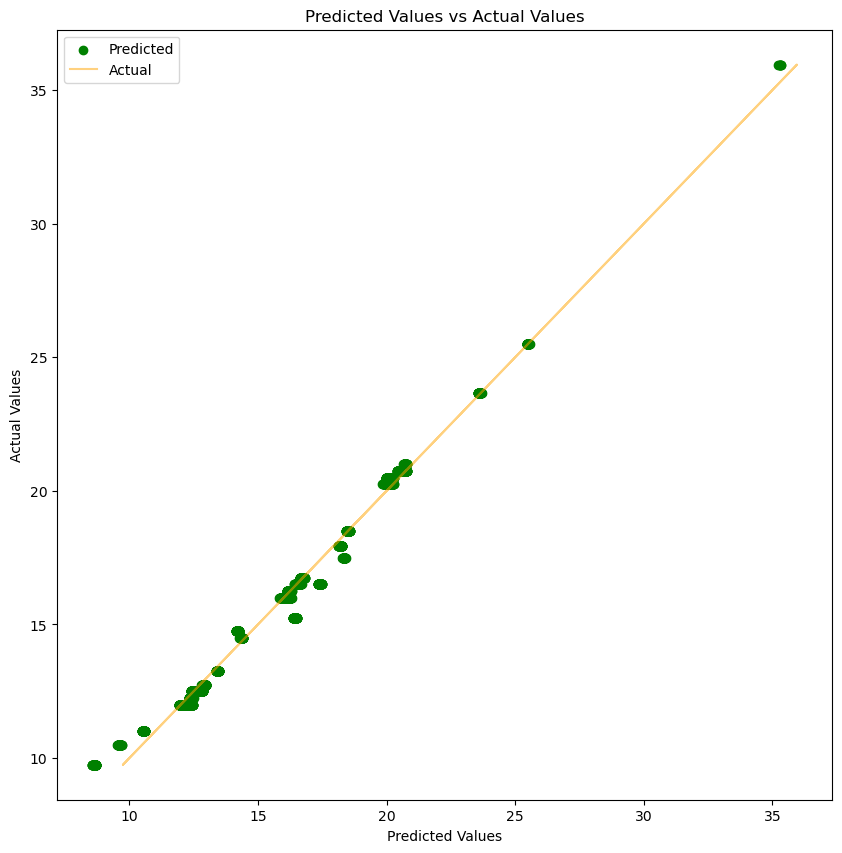

In [23]:
# Scatter plot predicted values vs actual values

plt.figure(figsize=(10, 10))

plt.scatter(Ridge_y_predict, y_test, c = 'green')
plt.plot(y_test, y_test, c = 'orange', alpha = 0.5)
plt.title('Predicted Values vs Actual Values')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.legend(['Predicted', 'Actual'])
plt.show()

This graph lets us see how well our model performed compared to the actual price values. 

## Histogram showing the deviation in errors from the model

Text(0.5, 0, 'Deviation')

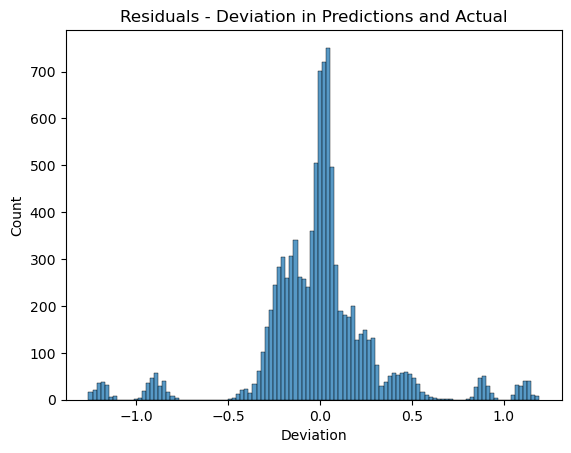

In [24]:
# Histogram showing deviation in predictions and actual values

# Get the residuals by finding the difference between the actual and predicted costs
resid = (y_test - Ridge_y_predict)
sns.histplot(resid)
plt.title('Residuals - Deviation in Predictions and Actual')
plt.ylabel('Count')
plt.xlabel('Deviation')

This graph helps us determine if our model is biased. We should be seeing a bell curve, however we don't so there is some refining that should be done.

## Scatter plot comparing our two best performing models

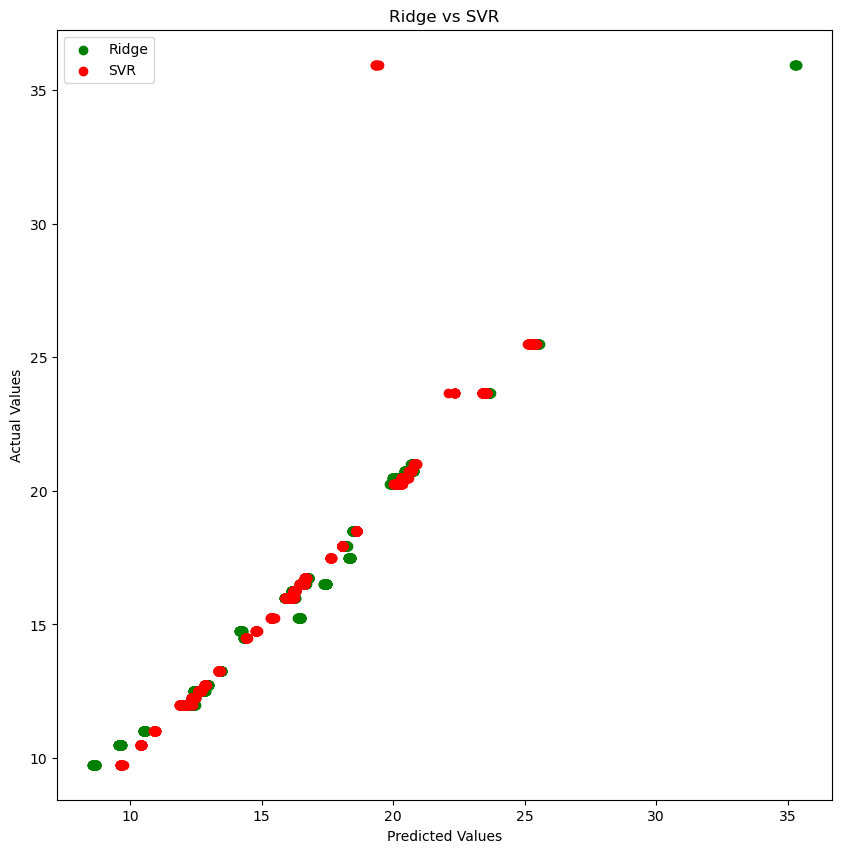

In [25]:
# Scatter plot ridge vs svr

plt.figure(figsize=(10, 10))

plt.scatter(Ridge_y_predict, y_test, c = 'green')
plt.scatter(y_predict, y_test, c = 'red')
plt.title('Ridge vs SVR')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.legend(['Ridge', 'SVR'])
plt.show()

This lets us see the difference in performance between our two best models. Since they had similar performace in our test metrics we want to get a better look at both their predictions through data visualization.